Mohit Ram Sharma, 224161018  
Abhishek Khajuria, 224161011

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1

### n=100

<BarContainer object of 10 artists>

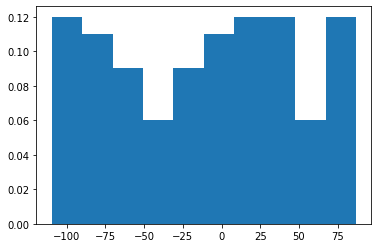

In [2]:
a=-100
b=100
n=100
S=a+np.random.rand(n)*(b-a)
min_S=S.min()
max_S=S.max()
m=10
b_s=(max_S-min_S)/m
H=np.zeros(m)
for i in range(n):
  b_i=int(np.floor((S[i]-min_S)/(b_s)))
  if b_i==m:
    b_i=b_i-1
  H[b_i]=H[b_i]+1/n

bin_arr=[min_S+b_s*i for i in range(m+1)]
bin_arr=np.array(bin_arr)
plt.bar(bin_arr[:-1],H,width=b_s)

### n=1000

5.700501484168383


<BarContainer object of 35 artists>

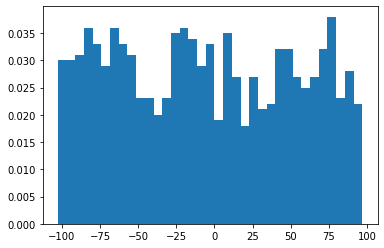

In [ ]:
a=-100
b=100
n=1000
S=a+np.random.rand(n)*(b-a)
min_S=S.min()
max_S=S.max()
m=35
b_s=(max_S-min_S)/m
H=np.zeros(m)
for i in range(n):
  b_i=int(np.floor((S[i]-min_S)/(b_s)))
  if b_i==m:
    b_i=b_i-1
  H[b_i]=H[b_i]+1/n

bin_arr=[min_S+b_s*i for i in range(m+1)]
bin_arr=np.array(bin_arr)
plt.bar(bin_arr[:-1],H,width=b_s)

### n=10000

1.9996904955127308


<BarContainer object of 100 artists>

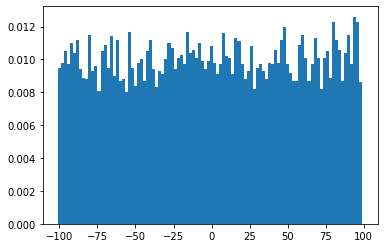

In [ ]:
a=-100
b=100
n=10000
S=a+np.random.rand(n)*(b-a)
min_S=S.min()
max_S=S.max()
m=100
b_s=(max_S-min_S)/m
H=np.zeros(m)
for i in range(n):
  b_i=int(np.floor((S[i]-min_S)/(b_s)))
  if b_i==m:
    b_i=b_i-1
  H[b_i]=H[b_i]+1/n

bin_arr=[min_S+b_s*i for i in range(m+1)]
bin_arr=np.array(bin_arr)
plt.bar(bin_arr[:-1],H,width=b_s)

# Problem 2

In [11]:
a=100
b=150
n=5000
S=a+np.random.rand(n)*(b-a)
min_S=S.min()
max_S=S.max()
m=400
b_s=(max_S-min_S)/m
H=np.zeros(m)
for i in range(n):
  b_i=int(np.floor((S[i]-min_S)/(b_s)))
  if b_i==m:
    b_i=b_i-1
  H[b_i]=H[b_i]+1/n

bin_arr=[min_S+b_s*i for i in range(m+1)]
X=[(bin_arr[i]+bin_arr[i+1])/2 for i in range(m)]
X=np.array(X)

### Weighted_AM

In [12]:
weighted_am=(X*H).sum()
print('Weighted AM =',weighted_am)

Weighted AM = 124.5620646423943


### Weighted GM

Given a sample x=(x_1,x_2,...,x_n) and weights w=(w_1,w_2,...,w_n) the weighted GM is

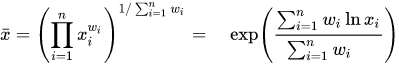

In [13]:
weighted_gm=np.exp((H*np.log(X)).sum()/H.sum())
print('Weighted GM =', weighted_gm)

Weighted GM = 123.7184767843271


### Weighted HM

Given a sample x=(x_1,x_2,...,x_n) and weights w=(w_1,w_2,...,w_n) the weighted HM is

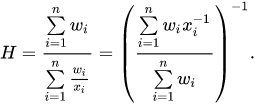

In [14]:
print("Weighted HM :",H.sum()/(H*np.reciprocal(X)).sum())

Weighted HM : 122.87363305067382


### Weighted Median

In [15]:
# To find median, we sort the x-values in increasing order but the x-values are already sorted in this case.
for i in range(m):
  if (H[:i+1].sum())>= .5 and (H[:i].sum() <= .5): # Check for which index the distribution is divided into two equal halves.
    if len(X)%2==0:
      print("Weighted Median :", (X[i]+X[i+1])/2)
    else:
      print("Weighted Median :", X[i])

Weighted Median : 124.50134348254548


### Weighted Mode

Weighted mode is the value of x_i for which the distribution is maximized

In [16]:
print("The weighted mode is", X[H.argmax()])

The weighted mode is 109.18981182038637


# Problem 3

Note : In order to calculate the weighted GM, the x-points must be positive

In [135]:
def central_tendency(X,W):
  # Weighted AM
  weighted_am = (X*W).sum()/W.sum()
  print('Weighted AM =',weighted_am)

  # Weighted GM

  weighted_gm = np.exp((W*np.log(X)).sum()/W.sum())
  print('Weighted GM =', weighted_gm)

  # Weighted HM
  weighted_HM = W.sum()/(W*np.reciprocal(X)).sum()
  print("Weighted HM :",weighted_HM)

  # Constructing the normalized frequency distribution
  P=W/W.sum()
  n = len(X)
  L=np.array(list(range(len(X))))
  for i in range(n-1):
    for j in range(0, n-i-1):
        if X[j] > X[j + 1]:
            X[j], X[j + 1] = X[j + 1], X[j]
            L[j],L[j+1] = L[j+1],L[j]
  Q=P.copy()
  for i in range(len(P)):
    P[i]=Q[L[i]]
  
  # Weighted Median
  for i in range(n):
    if (P[:i+1].sum())>= .5 and (P[:i].sum() <= .5): # Check for which index the distribution is divided into two equal halves.
      if len(X)%2==0:
        Weighted_Median = (X[i]+X[i+1])/2
      else:
        Weighted_Median = X[i]
  print("Weighted_Median :",Weighted_Median)
  # Weighted Mode
  weighted_mode=X[P.argmax()]
  print("The weighted mode is", weighted_mode)

In [136]:
X=np.random.uniform(5,20,10)
W=np.random.uniform(1,10,10)
print(X)
print(W)

[10.5442524   5.75313299  9.58357994  5.1760546  10.32790141 15.92095712
 15.43224366  6.40267004  9.10782611  5.20694952]
[7.79786566 7.96221361 9.9484162  1.30702602 8.65712454 5.37963636
 4.31615951 2.25416439 7.84822938 6.99091983]


In [137]:
central_tendency(X,W)

Weighted AM = 9.511712766431726
Weighted GM = 8.951377501061188
Weighted HM : 8.410898707100651
Weighted_Median : 9.955740671903898
The weighted mode is 9.583579937625673


# Problem 4(a)

Text(0.5, 1.0, 'Axis Aligned Ellipse')

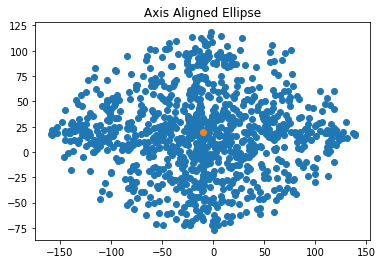

In [110]:
a=150
b=100
center_x=-10
center_y=20

a1=np.random.rand(1000)*a
b1=np.random.rand(1000)*b
t=np.random.rand(1000)*(2*np.pi)

x1=a1*np.cos(t)+center_x
y1=b1*np.sin(t)+center_y

# plt.figure(figsize=(14,6))

plt.scatter(x1,y1)
plt.scatter(-10,20) # Plotting the center
plt.title('Axis Aligned Ellipse')

# Problem 4(b)

In [4]:
points=np.random.randn(10,1000) # Generate random points
col_norms=np.linalg.norm(points,axis=0) # Calculate norms
centre=np.array([-1,2,-1,0,0,0,3,4,9,0]) # Center
for i in range(1000):
  points[:,i]=(points[:,i]/col_norms[i])*100+centre # Normalize and scale norm to 100 and shift to the center

# Problem 4(c)

In [7]:
import numpy as np

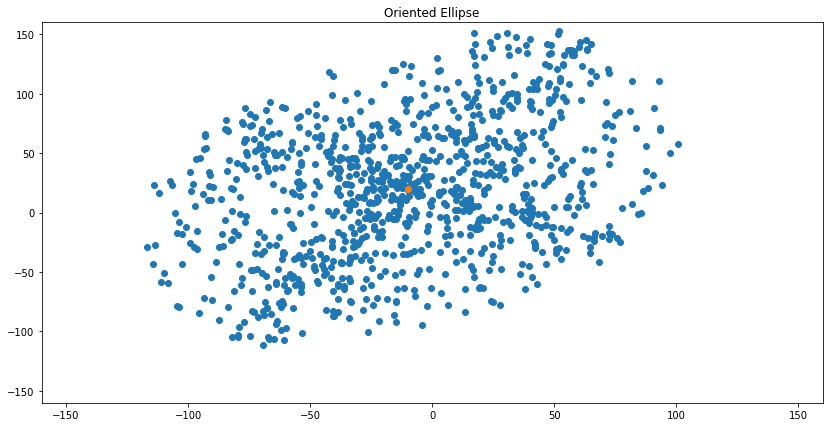

In [109]:
n=1000
r_x=150
r_y=100
center_x=-10
center_y=20

a1=np.random.rand(n)*r_x
b1=np.random.rand(n)*r_y
t=np.random.rand(n)*(2*np.pi)
x1=a1*np.cos(t)
y1=b1*np.sin(t)
x_new=x1*np.cos(np.pi/3)-y1*np.sin(np.pi/3)+center_x
y_new=x1*np.sin(np.pi/3)+y1*np.cos(np.pi/3)+center_y

plt.figure(figsize=(14,7))
plt.xlim([-160,160])
plt.ylim([-160,160])
plt.scatter(x_new,y_new)
plt.scatter(-10,20) # Plotting the center
plt.title('Oriented Ellipse')
plt.show()


# Problem 5

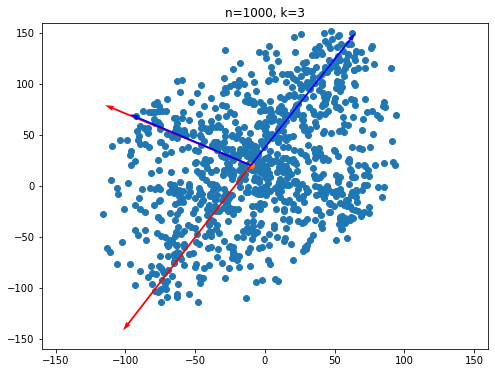

In [97]:
# Defining variables
n=1000
r_x=150
r_y=100
center_x=-10
center_y=20

# Creating ellipse points
a1=np.random.rand(n)*r_x
b1=np.random.rand(n)*r_y
t=np.random.rand(n)*(2*np.pi)
x1=a1*np.cos(t)
y1=b1*np.sin(t)
x_points=x1*np.cos(np.pi/3)-y1*np.sin(np.pi/3)+center_x
y_points=x1*np.sin(np.pi/3)+y1*np.cos(np.pi/3)+center_y

# saving ellipse point in s_eo array
s_eo=np.array([x_points,y_points])

# mean of s_eo
mu=s_eo.mean(axis=1)

# Covariance matrix computation
C=np.dot(np.transpose(np.transpose(s_eo)-mu),np.transpose(s_eo)-mu)
C=C/n

# obtaining Eigenvalule and eigenvectors
ev=np.linalg.eig(C)
lambda_1=ev[0][0] # First eigenvalue
lambda_2=ev[0][1] # Second eigenvalue
eig_vecs=ev[1] # eig contains eigenvectors columnwise
k=3 # k value

# Figure settings
plt.figure(figsize=(8,6))
plt.xlim([-160,160])
plt.ylim([-160,160])
plt.title('n=1000, k=3')

# Plotting the ellipse
plt.scatter(x_points,y_points)
plt.scatter(-10,20) # Plotting the center

# Plotting eigenvalues
plt.quiver(-10,20,k*np.sqrt(lambda_1)*eig_vecs[0,0],k*np.sqrt(lambda_1)*eig_vecs[1,0],width=0.004, angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(-10,20,k*np.sqrt(lambda_2)*eig_vecs[0,1],k*np.sqrt(lambda_2)*eig_vecs[1,1],width=0.004, angles='xy', scale_units='xy', scale=1, color='red')

#Plotting axes of the ellipses
major_ax=np.array([r_x*np.cos(np.pi/3),r_x*np.sin(np.pi/3)])
minor_ax=np.array([-r_y*np.sin(np.pi/3),r_y*np.cos(np.pi/3)])
plt.quiver(-10,20,major_ax[0],major_ax[1],width=0.004, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(-10,20,minor_ax[0],minor_ax[1],width=0.004, angles='xy', scale_units='xy', scale=1, color='blue')

plt.show()


### k = 4

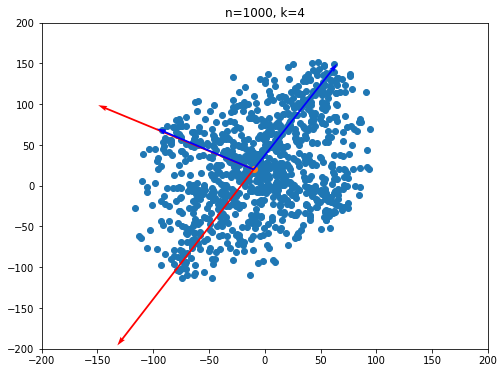

In [98]:
k=4 # k value

# Figure settings
plt.figure(figsize=(8,6))
plt.xlim([-200,200])
plt.ylim([-200,200])
plt.title('n=1000, k=4')
# Plotting the ellipse
plt.scatter(x_points,y_points)
plt.scatter(-10,20) # Plotting the center

# Plotting eigenvalues
plt.quiver(-10,20,k*np.sqrt(lambda_1)*eig_vecs[0,0],k*np.sqrt(lambda_1)*eig_vecs[1,0],width=0.004, angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(-10,20,k*np.sqrt(lambda_2)*eig_vecs[0,1],k*np.sqrt(lambda_2)*eig_vecs[1,1],width=0.004, angles='xy', scale_units='xy', scale=1, color='red')

#Plotting axes of the ellipses
major_ax=np.array([r_x*np.cos(np.pi/3),r_x*np.sin(np.pi/3)])
minor_ax=np.array([-r_y*np.sin(np.pi/3),r_y*np.cos(np.pi/3)])
plt.quiver(-10,20,major_ax[0],major_ax[1],width=0.004, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(-10,20,minor_ax[0],minor_ax[1],width=0.004, angles='xy', scale_units='xy', scale=1, color='blue')

plt.show()


### k=5

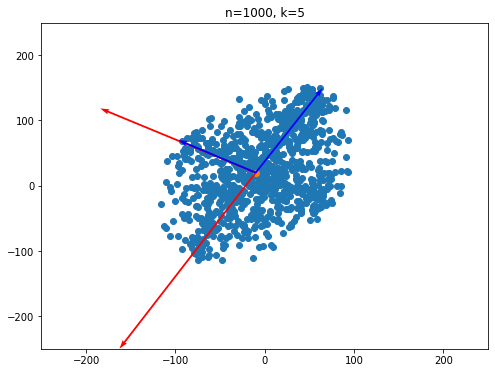

In [99]:
k=5 # k value

# Figure settings
plt.figure(figsize=(8,6))
plt.xlim([-250,250])
plt.ylim([-250,250])
plt.title('n=1000, k=5')
# Plotting the ellipse
plt.scatter(x_points,y_points)
plt.scatter(-10,20) # Plotting the center

# Plotting eigenvalues
plt.quiver(-10,20,k*np.sqrt(lambda_1)*eig_vecs[0,0],k*np.sqrt(lambda_1)*eig_vecs[1,0],width=0.004, angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(-10,20,k*np.sqrt(lambda_2)*eig_vecs[0,1],k*np.sqrt(lambda_2)*eig_vecs[1,1],width=0.004, angles='xy', scale_units='xy', scale=1, color='red')

#Plotting axes of the ellipses
major_ax=np.array([r_x*np.cos(np.pi/3),r_x*np.sin(np.pi/3)])
minor_ax=np.array([-r_y*np.sin(np.pi/3),r_y*np.cos(np.pi/3)])
plt.quiver(-10,20,major_ax[0],major_ax[1],width=0.004, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(-10,20,minor_ax[0],minor_ax[1],width=0.004, angles='xy', scale_units='xy', scale=1, color='blue')

plt.show()


Increasing the values of n

### n=100

Let's see what happens when the n value is ver less

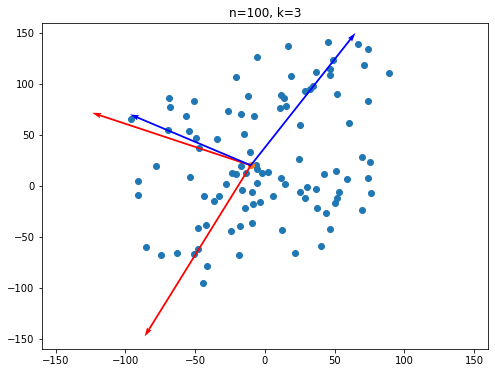

In [100]:
# Defining variables
n=100
r_x=150
r_y=100
center_x=-10
center_y=20

# Creating ellipse points
a1=np.random.rand(n)*r_x
b1=np.random.rand(n)*r_y
t=np.random.rand(n)*(2*np.pi)
x1=a1*np.cos(t)
y1=b1*np.sin(t)
x_points=x1*np.cos(np.pi/3)-y1*np.sin(np.pi/3)+center_x
y_points=x1*np.sin(np.pi/3)+y1*np.cos(np.pi/3)+center_y

# saving ellipse point in s_eo array
s_eo=np.array([x_points,y_points])

# mean of s_eo
mu=s_eo.mean(axis=1)

# Covariance matrix computation
C=np.dot(np.transpose(np.transpose(s_eo)-mu),np.transpose(s_eo)-mu)
C=C/n

# obtaining Eigenvalule and eigenvectors
ev=np.linalg.eig(C)
lambda_1=ev[0][0] # First eigenvalue
lambda_2=ev[0][1] # Second eigenvalue
eig_vecs=ev[1] # eig contains eigenvectors columnwise
k=3 # k value

# Figure settings
plt.figure(figsize=(8,6))
plt.xlim([-160,160])
plt.ylim([-160,160])
plt.title('n=100, k=3')
# Plotting the ellipse
plt.scatter(x_points,y_points)
plt.scatter(-10,20) # Plotting the center

# Plotting eigenvalues
plt.quiver(-10,20,k*np.sqrt(lambda_1)*eig_vecs[0,0],k*np.sqrt(lambda_1)*eig_vecs[1,0],width=0.004, angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(-10,20,k*np.sqrt(lambda_2)*eig_vecs[0,1],k*np.sqrt(lambda_2)*eig_vecs[1,1],width=0.004, angles='xy', scale_units='xy', scale=1, color='red')

#Plotting axes of the ellipses
major_ax=np.array([r_x*np.cos(np.pi/3),r_x*np.sin(np.pi/3)])
minor_ax=np.array([-r_y*np.sin(np.pi/3),r_y*np.cos(np.pi/3)])
plt.quiver(-10,20,major_ax[0],major_ax[1],width=0.004, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(-10,20,minor_ax[0],minor_ax[1],width=0.004, angles='xy', scale_units='xy', scale=1, color='blue')

plt.show()


### n=500

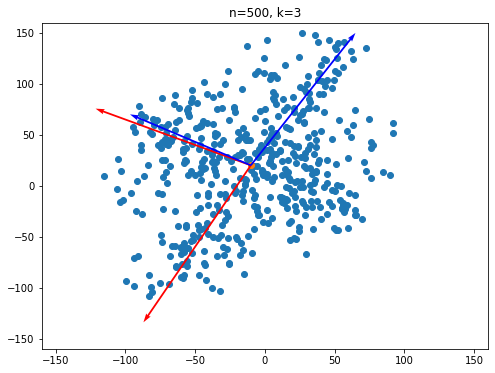

In [101]:
# Defining variables
n=500
r_x=150
r_y=100
center_x=-10
center_y=20

# Creating ellipse points
a1=np.random.rand(n)*r_x
b1=np.random.rand(n)*r_y
t=np.random.rand(n)*(2*np.pi)
x1=a1*np.cos(t)
y1=b1*np.sin(t)
x_points=x1*np.cos(np.pi/3)-y1*np.sin(np.pi/3)+center_x
y_points=x1*np.sin(np.pi/3)+y1*np.cos(np.pi/3)+center_y

# saving ellipse point in s_eo array
s_eo=np.array([x_points,y_points])

# mean of s_eo
mu=s_eo.mean(axis=1)

# Covariance matrix computation
C=np.dot(np.transpose(np.transpose(s_eo)-mu),np.transpose(s_eo)-mu)
C=C/n

# obtaining Eigenvalule and eigenvectors
ev=np.linalg.eig(C)
lambda_1=ev[0][0] # First eigenvalue
lambda_2=ev[0][1] # Second eigenvalue
eig_vecs=ev[1] # eig contains eigenvectors columnwise
k=3 # k value

# Figure settings
plt.figure(figsize=(8,6))
plt.xlim([-160,160])
plt.ylim([-160,160])
plt.title('n=500, k=3')
# Plotting the ellipse
plt.scatter(x_points,y_points)
plt.scatter(-10,20) # Plotting the center

# Plotting eigenvalues
plt.quiver(-10,20,k*np.sqrt(lambda_1)*eig_vecs[0,0],k*np.sqrt(lambda_1)*eig_vecs[1,0],width=0.004, angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(-10,20,k*np.sqrt(lambda_2)*eig_vecs[0,1],k*np.sqrt(lambda_2)*eig_vecs[1,1],width=0.004, angles='xy', scale_units='xy', scale=1, color='red')

#Plotting axes of the ellipses
major_ax=np.array([r_x*np.cos(np.pi/3),r_x*np.sin(np.pi/3)])
minor_ax=np.array([-r_y*np.sin(np.pi/3),r_y*np.cos(np.pi/3)])
plt.quiver(-10,20,major_ax[0],major_ax[1],width=0.004, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(-10,20,minor_ax[0],minor_ax[1],width=0.004, angles='xy', scale_units='xy', scale=1, color='blue')

plt.show()


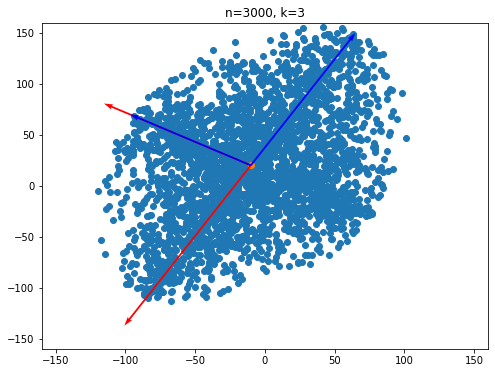

In [102]:
# Defining variables
n=3000
r_x=150
r_y=100
center_x=-10
center_y=20

# Creating ellipse points
a1=np.random.rand(n)*r_x
b1=np.random.rand(n)*r_y
t=np.random.rand(n)*(2*np.pi)
x1=a1*np.cos(t)
y1=b1*np.sin(t)
x_points=x1*np.cos(np.pi/3)-y1*np.sin(np.pi/3)+center_x
y_points=x1*np.sin(np.pi/3)+y1*np.cos(np.pi/3)+center_y

# saving ellipse point in s_eo array
s_eo=np.array([x_points,y_points])

# mean of s_eo
mu=s_eo.mean(axis=1)

# Covariance matrix computation
C=np.dot(np.transpose(np.transpose(s_eo)-mu),np.transpose(s_eo)-mu)
C=C/n

# obtaining Eigenvalule and eigenvectors
ev=np.linalg.eig(C)
lambda_1=ev[0][0] # First eigenvalue
lambda_2=ev[0][1] # Second eigenvalue
eig_vecs=ev[1] # eig contains eigenvectors columnwise
k=3 # k value

# Figure settings
plt.figure(figsize=(8,6))
plt.xlim([-160,160])
plt.ylim([-160,160])
plt.title('n=3000, k=3')
# Plotting the ellipse
plt.scatter(x_points,y_points)
plt.scatter(-10,20) # Plotting the center

# Plotting eigenvalues
plt.quiver(-10,20,k*np.sqrt(lambda_1)*eig_vecs[0,0],k*np.sqrt(lambda_1)*eig_vecs[1,0],width=0.004, angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(-10,20,k*np.sqrt(lambda_2)*eig_vecs[0,1],k*np.sqrt(lambda_2)*eig_vecs[1,1],width=0.004, angles='xy', scale_units='xy', scale=1, color='red')

#Plotting axes of the ellipses
major_ax=np.array([r_x*np.cos(np.pi/3),r_x*np.sin(np.pi/3)])
minor_ax=np.array([-r_y*np.sin(np.pi/3),r_y*np.cos(np.pi/3)])
plt.quiver(-10,20,major_ax[0],major_ax[1],width=0.004, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(-10,20,minor_ax[0],minor_ax[1],width=0.004, angles='xy', scale_units='xy', scale=1, color='blue')

plt.show()


## Observations



1.   As the number of points, n, increases the axes of the ellipse and the eigenvectors come closer and almost coincide
2.   As the number of points, n, increases the data points gets concentrated near the eigenvectors of the covariance matrix
